In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255., test_images/255.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

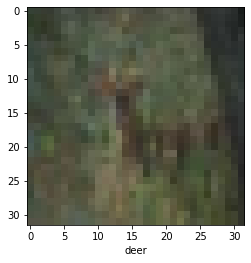

In [4]:
IMG_INDEX = 10
plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation= 'relu'))

In [6]:
# Let's add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10))

In [7]:
model.compile(optimizer= 'adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.4543 - accuracy: 0.4738 - val_loss: 1.1566 - val_accuracy: 0.5830
Epoch 2/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.0896 - accuracy: 0.6167 - val_loss: 1.0248 - val_accuracy: 0.6423
Epoch 3/5
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9426 - accuracy: 0.6700 - val_loss: 0.9267 - val_accuracy: 0.6768
Epoch 4/5
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8393 - accuracy: 0.7073 - val_loss: 0.9098 - val_accuracy: 0.6844
Epoch 5/5
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7724 - accuracy: 0.7289 - val_loss: 0.8816 - val_accuracy: 0.6984


Data Augumentation helps avoid overfitting by creating a larger dataset from a smaller one through random transformations on the images.

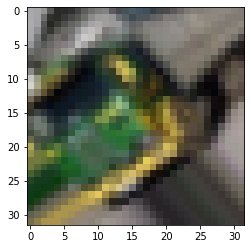

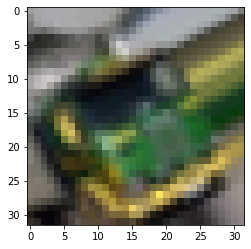

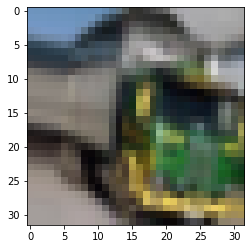

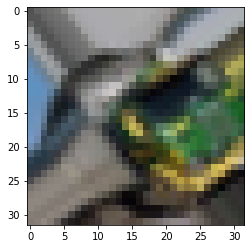

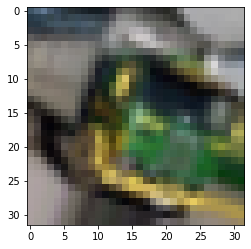

In [9]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40, width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

test_img = train_images[14]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix = 'test', save_format = 'jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break

plt.show()